## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.625603  1.088434  0.664379  0.100718  0.105444  0.222557
1  1.005623 -0.541540 -1.564042  0.646524 -0.907741  1.041993
2  1.374484 -0.303939  0.402138 -0.463240 -0.905081 -0.009694
3 -0.288267 -0.268914 -0.203903  1.693976  1.535442  1.083073
4 -1.036522  0.019183 -1.130012  0.632747  1.657609  0.587390


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0184142	total: 67.6ms	remaining: 1m 7s
1:	learn: 1.0079549	total: 69.1ms	remaining: 34.5s
2:	learn: 0.9956841	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9844469	total: 70.3ms	remaining: 17.5s
4:	learn: 0.9730164	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9622449	total: 71.5ms	remaining: 11.8s
6:	learn: 0.9504273	total: 72ms	remaining: 10.2s
7:	learn: 0.9402379	total: 72.6ms	remaining: 9s
8:	learn: 0.9302174	total: 73.1ms	remaining: 8.05s
9:	learn: 0.9199885	total: 73.6ms	remaining: 7.28s
10:	learn: 0.9103858	total: 74.2ms	remaining: 6.67s
11:	learn: 0.8996267	total: 74.9ms	remaining: 6.16s
12:	learn: 0.8911735	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8817302	total: 76ms	remaining: 5.35s
14:	learn: 0.8744824	total: 76.6ms	remaining: 5.03s
15:	learn: 0.8664796	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8572710	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8487335	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8412919	total: 78.5ms	remaining: 4.05s

88:	learn: 0.4313818	total: 109ms	remaining: 1.12s
89:	learn: 0.4277588	total: 110ms	remaining: 1.11s
90:	learn: 0.4240213	total: 110ms	remaining: 1.1s
91:	learn: 0.4204280	total: 111ms	remaining: 1.09s
92:	learn: 0.4164962	total: 111ms	remaining: 1.08s
93:	learn: 0.4135921	total: 111ms	remaining: 1.07s
94:	learn: 0.4101780	total: 112ms	remaining: 1.06s
95:	learn: 0.4069183	total: 112ms	remaining: 1.05s
96:	learn: 0.4035464	total: 113ms	remaining: 1.05s
97:	learn: 0.4004959	total: 113ms	remaining: 1.04s
98:	learn: 0.3967806	total: 113ms	remaining: 1.03s
99:	learn: 0.3927815	total: 114ms	remaining: 1.02s
100:	learn: 0.3901284	total: 114ms	remaining: 1.01s
101:	learn: 0.3864783	total: 115ms	remaining: 1.01s
102:	learn: 0.3835833	total: 115ms	remaining: 1s
103:	learn: 0.3801315	total: 115ms	remaining: 993ms
104:	learn: 0.3767642	total: 116ms	remaining: 986ms
105:	learn: 0.3737144	total: 117ms	remaining: 985ms
106:	learn: 0.3705979	total: 117ms	remaining: 979ms
107:	learn: 0.3680638	total:

257:	learn: 0.1376001	total: 187ms	remaining: 539ms
258:	learn: 0.1365970	total: 188ms	remaining: 538ms
259:	learn: 0.1362832	total: 188ms	remaining: 536ms
260:	learn: 0.1356333	total: 189ms	remaining: 535ms
261:	learn: 0.1347057	total: 190ms	remaining: 534ms
262:	learn: 0.1339192	total: 190ms	remaining: 533ms
263:	learn: 0.1336280	total: 191ms	remaining: 531ms
264:	learn: 0.1330894	total: 191ms	remaining: 530ms
265:	learn: 0.1321407	total: 191ms	remaining: 528ms
266:	learn: 0.1318423	total: 192ms	remaining: 527ms
267:	learn: 0.1316158	total: 193ms	remaining: 526ms
268:	learn: 0.1311869	total: 193ms	remaining: 525ms
269:	learn: 0.1306946	total: 194ms	remaining: 523ms
270:	learn: 0.1298488	total: 194ms	remaining: 522ms
271:	learn: 0.1292587	total: 194ms	remaining: 520ms
272:	learn: 0.1283535	total: 195ms	remaining: 519ms
273:	learn: 0.1276330	total: 195ms	remaining: 517ms
274:	learn: 0.1273162	total: 196ms	remaining: 516ms
275:	learn: 0.1270292	total: 196ms	remaining: 515ms
276:	learn: 

475:	learn: 0.0494653	total: 293ms	remaining: 322ms
476:	learn: 0.0493950	total: 293ms	remaining: 322ms
477:	learn: 0.0492180	total: 294ms	remaining: 321ms
478:	learn: 0.0491487	total: 294ms	remaining: 320ms
479:	learn: 0.0488664	total: 295ms	remaining: 319ms
480:	learn: 0.0487980	total: 295ms	remaining: 318ms
481:	learn: 0.0484250	total: 295ms	remaining: 317ms
482:	learn: 0.0481151	total: 296ms	remaining: 317ms
483:	learn: 0.0478328	total: 296ms	remaining: 316ms
484:	learn: 0.0475314	total: 297ms	remaining: 315ms
485:	learn: 0.0471723	total: 297ms	remaining: 314ms
486:	learn: 0.0468794	total: 298ms	remaining: 314ms
487:	learn: 0.0465285	total: 298ms	remaining: 313ms
488:	learn: 0.0462439	total: 299ms	remaining: 312ms
489:	learn: 0.0459993	total: 299ms	remaining: 312ms
490:	learn: 0.0457600	total: 300ms	remaining: 311ms
491:	learn: 0.0455257	total: 300ms	remaining: 310ms
492:	learn: 0.0452965	total: 301ms	remaining: 309ms
493:	learn: 0.0450722	total: 301ms	remaining: 309ms
494:	learn: 

639:	learn: 0.0261735	total: 392ms	remaining: 220ms
640:	learn: 0.0261342	total: 392ms	remaining: 220ms
641:	learn: 0.0260814	total: 392ms	remaining: 219ms
642:	learn: 0.0259119	total: 393ms	remaining: 218ms
643:	learn: 0.0258771	total: 393ms	remaining: 217ms
644:	learn: 0.0258406	total: 393ms	remaining: 216ms
645:	learn: 0.0257868	total: 394ms	remaining: 216ms
646:	learn: 0.0256456	total: 394ms	remaining: 215ms
647:	learn: 0.0256115	total: 394ms	remaining: 214ms
648:	learn: 0.0255667	total: 395ms	remaining: 213ms
649:	learn: 0.0254653	total: 395ms	remaining: 213ms
650:	learn: 0.0253155	total: 395ms	remaining: 212ms
651:	learn: 0.0251700	total: 396ms	remaining: 211ms
652:	learn: 0.0251042	total: 396ms	remaining: 211ms
653:	learn: 0.0249820	total: 397ms	remaining: 210ms
654:	learn: 0.0249503	total: 397ms	remaining: 209ms
655:	learn: 0.0248965	total: 397ms	remaining: 208ms
656:	learn: 0.0247562	total: 398ms	remaining: 208ms
657:	learn: 0.0247212	total: 398ms	remaining: 207ms
658:	learn: 

816:	learn: 0.0136609	total: 479ms	remaining: 107ms
817:	learn: 0.0136308	total: 479ms	remaining: 107ms
818:	learn: 0.0135655	total: 480ms	remaining: 106ms
819:	learn: 0.0134982	total: 480ms	remaining: 105ms
820:	learn: 0.0134557	total: 481ms	remaining: 105ms
821:	learn: 0.0134262	total: 481ms	remaining: 104ms
822:	learn: 0.0133667	total: 481ms	remaining: 104ms
823:	learn: 0.0133191	total: 482ms	remaining: 103ms
824:	learn: 0.0132645	total: 482ms	remaining: 102ms
825:	learn: 0.0132037	total: 483ms	remaining: 102ms
826:	learn: 0.0131574	total: 483ms	remaining: 101ms
827:	learn: 0.0130999	total: 484ms	remaining: 101ms
828:	learn: 0.0130870	total: 484ms	remaining: 99.9ms
829:	learn: 0.0130349	total: 485ms	remaining: 99.3ms
830:	learn: 0.0129766	total: 485ms	remaining: 98.7ms
831:	learn: 0.0129319	total: 486ms	remaining: 98.1ms
832:	learn: 0.0128752	total: 486ms	remaining: 97.5ms
833:	learn: 0.0128315	total: 487ms	remaining: 96.8ms
834:	learn: 0.0127624	total: 487ms	remaining: 96.2ms
835:	

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

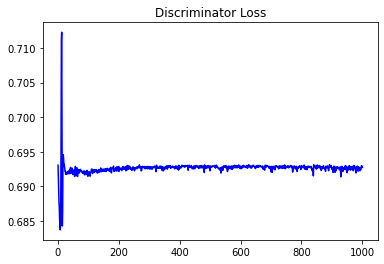

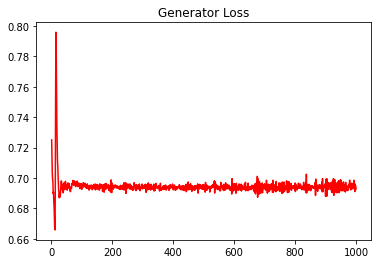

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.032776801368405564


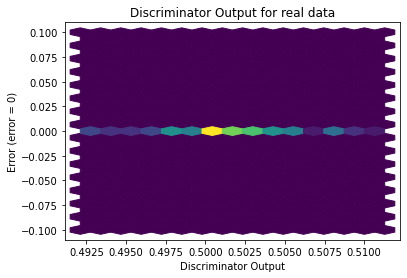

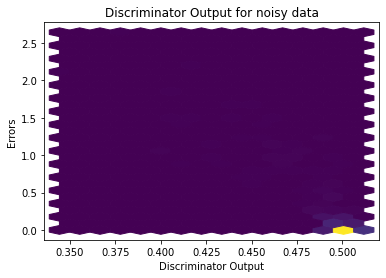

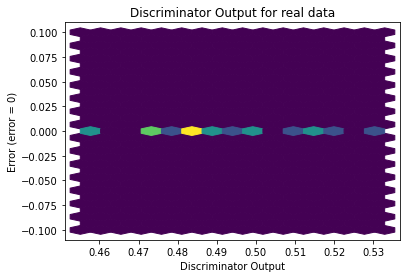

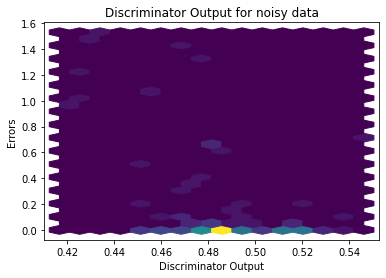

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


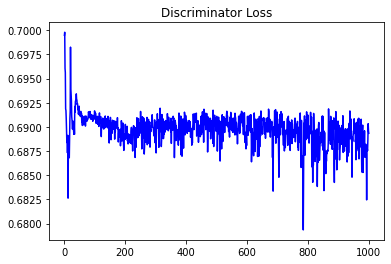

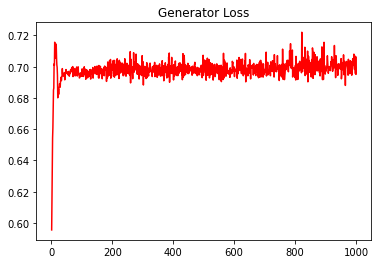

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.022692487561209163


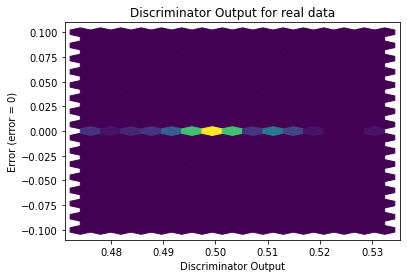

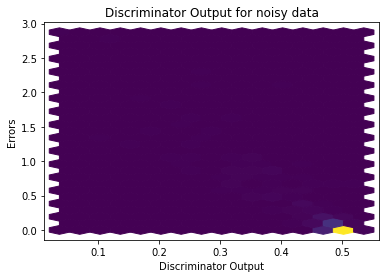

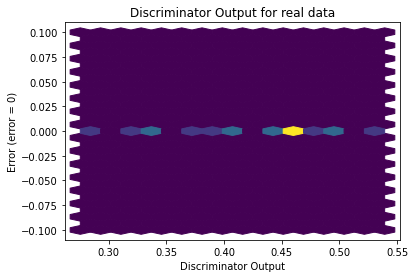

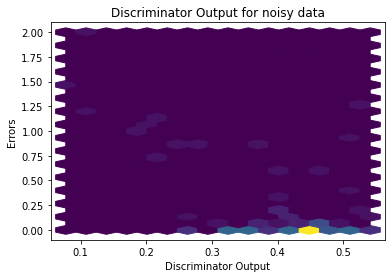

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1198]], requires_grad=True)
